<a href="https://colab.research.google.com/github/Chetan265/phishing/blob/main/phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Chetan/dataset/phishing.txt",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.columns =['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//','PrefixSuffix-', 'SubDomains', 'HTTPS',
             'DomainRegLen', 'Favicon','NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL','LinksInScriptTags',
             'ServerFormHandler', 'InfoEmail', 'AbnormalURL','WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
             'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain','DNSRecording', 'WebsiteTraffic', 'PageRank',
             'GoogleIndex','LinksPointingToPage', 'StatsReport', 'class']
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
df.shape

(11055, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11055 non-null  int64
 1   LongURL              11055 non-null  int64
 2   ShortURL             11055 non-null  int64
 3   Symbol@              11055 non-null  int64
 4   Redirecting//        11055 non-null  int64
 5   PrefixSuffix-        11055 non-null  int64
 6   SubDomains           11055 non-null  int64
 7   HTTPS                11055 non-null  int64
 8   DomainRegLen         11055 non-null  int64
 9   Favicon              11055 non-null  int64
 10  NonStdPort           11055 non-null  int64
 11  HTTPSDomainURL       11055 non-null  int64
 12  RequestURL           11055 non-null  int64
 13  AnchorURL            11055 non-null  int64
 14  LinksInScriptTags    11055 non-null  int64
 15  ServerFormHandler    11055 non-null  int64
 16  InfoEmail            1

In [7]:
df.corr()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
UsingIP,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,0.060979,0.363534,0.029773,0.099847,0.006212,-0.010962,0.077989,0.336549,-0.321181,0.084059,0.042881,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
LongURL,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,0.000323,-0.089383,0.246348,-0.023396,0.052869,0.414196,-0.014457,-0.106761,0.046832,-0.045103,-0.013613,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
ShortURL,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,0.002201,0.757838,-0.037235,0.000561,-0.133379,-0.022723,0.049328,0.739290,-0.534530,0.062383,0.038118,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
Symbol@,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,0.364891,0.104561,0.027909,0.057914,-0.070861,-0.008672,0.370123,0.203945,-0.028160,0.279697,0.219503,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
Redirecting//,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,0.025060,0.760799,-0.026368,-0.005036,-0.125583,-0.041672,0.031898,0.723724,-0.591478,0.086635,0.025863,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
PrefixSuffix-,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,-0.022546,-0.070153,0.098675,0.348871,0.100254,0.001326,-0.045000,-0.077620,0.016271,0.012578,-0.024868,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
SubDomains,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,0.004863,-0.037239,0.104857,0.229491,0.093646,0.096089,0.008830,-0.034908,0.031206,-0.018082,0.018230,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
HTTPS,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,0.027473,-0.029941,0.193054,0.535786,0.176825,0.171402,0.008062,-0.046245,-0.021070,0.023586,0.015854,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
DomainRegLen,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,0.022478,0.059161,-0.609970,-0.160257,-0.101084,-0.136422,0.039260,0.058109,-0.016300,0.023784,0.023520,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,0.803834,0.049483,-0.004620,0.037698,-0.100341,-0.012279,0.668317,0.071848,-0.015621,0.706179,0.414382,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


In [142]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [143]:
X = df.drop(columns = ['class'])
y = df['class']

In [145]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 265)

In [146]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = log_reg.predict(x_test);y_pred

array([-1,  1, -1, ...,  1,  1,  1])

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
mat_log = confusion_matrix(y_test,y_pred);mat_log


array([[1317,  163],
       [  87, 1750]])

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.89      0.91      1480
           1       0.91      0.95      0.93      1837

    accuracy                           0.92      3317
   macro avg       0.93      0.92      0.92      3317
weighted avg       0.93      0.92      0.92      3317



In [16]:
accuracy = accuracy_score(y_test,y_pred);accuracy 

0.924630690382876

In [17]:
from sklearn.metrics import roc_curve,roc_auc_score
auc = roc_auc_score(y_test,y_pred);auc

0.9212525195309625

In [18]:
y_pred_prob = log_reg.predict_proba(x_test);y_pred_prob

array([[6.50163589e-01, 3.49836411e-01],
       [1.19580933e-01, 8.80419067e-01],
       [9.99937061e-01, 6.29393565e-05],
       ...,
       [2.72088262e-02, 9.72791174e-01],
       [5.13362538e-03, 9.94866375e-01],
       [1.69643171e-01, 8.30356829e-01]])

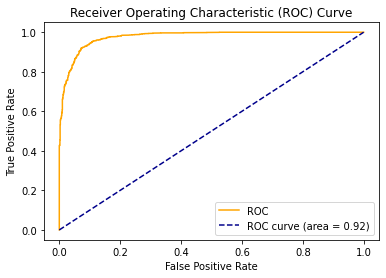

0.9212525195309625


In [19]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred))

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [21]:
dt = DecisionTreeClassifier(random_state=265)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=265, splitter='best')

In [22]:
y_pred = dt.predict(x_test);y_pred

array([ 1,  1, -1, ...,  1,  1, -1])

In [23]:
mat_dt = confusion_matrix(y_test,y_pred);mat_dt

array([[1420,   60],
       [  75, 1762]])

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95      1480
           1       0.97      0.96      0.96      1837

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [25]:
accuracy_score(y_test,y_pred)

0.9593005728067531

In [26]:
auc = roc_auc_score(y_test,y_pred);auc

0.9593160117112213

In [27]:
y_pred_prob_dt = dt.predict_proba(x_test);y_pred_prob_dt

array([[0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5]])

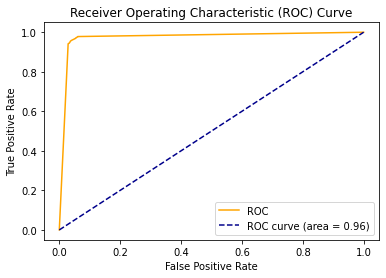

0.9593160117112213


In [28]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_dt[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred))

In [29]:
leaves = [1,2,4,5,10,20,30,40,80,100,200,150]

In [30]:
grid_param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2'],
    'min_samples_leaf':leaves
}

In [31]:
dt1 = GridSearchCV(estimator=dt,param_grid=grid_param_dt,cv=5,n_jobs =-1,verbose = 3)
dt1.fit(x_train,y_train)
dt1.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.1s finished


{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1}

In [32]:
dt1 = DecisionTreeClassifier(criterion = 'gini', max_features = 'auto', min_samples_leaf = 1,random_state=265)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=265, splitter='best')

In [33]:
y_pred_dt1 = dt1.predict(x_test);y_pred_dt1

array([ 1,  1, -1, ...,  1,  1, -1])

In [34]:
accuracy_score(y_test,y_pred_dt1)

0.9568887548990052

In [35]:
confusion_matrix(y_test,y_pred_dt1)

array([[1401,   79],
       [  64, 1773]])

In [36]:
auc_dt1 = roc_auc_score(y_test,y_pred_dt1);auc_dt1

0.9558911047683504

In [37]:
y_pred_prob_dt1 = dt1.predict_proba(x_test);y_pred_prob_dt1

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

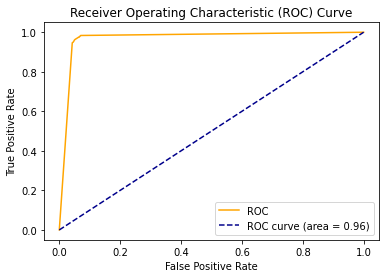

0.9558911047683504


In [38]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_dt1[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_dt1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_dt1))

## Random Forest

In [39]:
rf = RandomForestClassifier(random_state = 265)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=265,
                       verbose=0, warm_start=False)

In [40]:
y_pred_rf = rf.predict(x_test);y_pred_rf

array([ 1,  1, -1, ...,  1,  1,  1])

In [41]:
accuracy_score(y_test,y_pred_rf)

0.9683448899608079

In [42]:
confusion_matrix(y_test,y_pred_rf)

array([[1417,   63],
       [  42, 1795]])

In [43]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1480
           1       0.97      0.98      0.97      1837

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [44]:
auc_rf = roc_auc_score(y_test,y_pred_rf);auc_rf

0.9672845341258515

In [45]:
y_pred_prob_rf = rf.predict_proba(x_test);y_pred_prob_rf

array([[0.26      , 0.74      ],
       [0.05      , 0.95      ],
       [1.        , 0.        ],
       ...,
       [0.03      , 0.97      ],
       [0.        , 1.        ],
       [0.25916667, 0.74083333]])

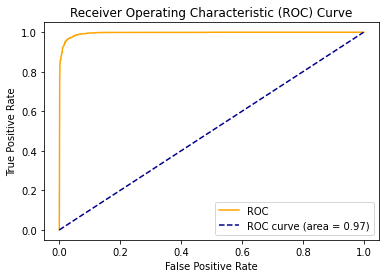

0.9672845341258515


In [46]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_rf[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_rf))

In [47]:
leaves = [1,2,4,5,10,20,30,40,80,100,200,150]

In [48]:
grid_param_rand = {
    "n_estimators" : [10,20,30,40,50,60,70,80,100],
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2'],
    'min_samples_leaf':leaves
}

In [49]:
rf1 = GridSearchCV(estimator=rf,param_grid=grid_param_rand,cv=5,n_jobs =-1,verbose = 3)
rf1.fit(x_train,y_train)
rf1.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1170 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1586 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2066 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  6.0min finished


{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [50]:
rf1 = RandomForestClassifier(criterion = "gini", max_features = "log2", n_estimators = 100,min_samples_leaf = 1,random_state = 265)
rf1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=265,
                       verbose=0, warm_start=False)

In [51]:
y_pred_rf1 = rf1.predict(x_test);y_pred_rf1

array([ 1,  1, -1, ...,  1,  1,  1])

In [52]:
accuracy_score(y_test,y_pred_rf1)

0.970756707868556

In [53]:
confusion_matrix(y_test,y_pred_rf1)

array([[1418,   62],
       [  35, 1802]])

In [54]:
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1480
           1       0.97      0.98      0.97      1837

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [55]:
auc_rf1 = roc_auc_score(y_test,y_pred_rf1);auc_rf1

0.9695276523120835

In [56]:
y_pred_prob_rf1 = rf1.predict_proba(x_test);y_pred_prob_rf1

array([[0.3       , 0.7       ],
       [0.02      , 0.98      ],
       [0.99      , 0.01      ],
       ...,
       [0.01      , 0.99      ],
       [0.        , 1.        ],
       [0.34483333, 0.65516667]])

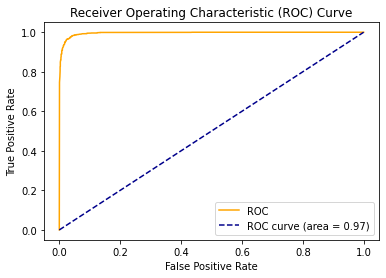

0.9695276523120835


In [57]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_rf1[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_rf1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_rf1))

## Ada Boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 265)
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=265)

In [59]:
y_pred_ada = ada.predict(x_test);y_pred_ada

array([ 1,  1, -1, ...,  1,  1,  1])

In [60]:
accuracy_score(y_test,y_pred_ada)

0.93186614410612

In [61]:
confusion_matrix(y_test,y_pred_ada)

array([[1331,  149],
       [  77, 1760]])

In [62]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

          -1       0.95      0.90      0.92      1480
           1       0.92      0.96      0.94      1837

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [63]:
auc_ada = roc_auc_score(y_test,y_pred_ada);auc_ada

0.9287040783298268

In [64]:
y_pred_prob_ada = ada.predict_proba(x_test);y_pred_prob_ada

array([[0.49584394, 0.50415606],
       [0.49362549, 0.50637451],
       [0.55840491, 0.44159509],
       ...,
       [0.47564546, 0.52435454],
       [0.46346901, 0.53653099],
       [0.49264145, 0.50735855]])

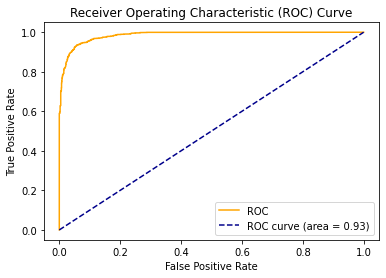

0.9287040783298268


In [65]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_ada[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_ada)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_ada))

In [66]:
grid_param_ada={'n_estimators':[25,50,100,250,500,1000,2000],'learning_rate':[.001,0.0001,0.00001,0.01,.1,1]}

In [67]:
grid_search_ada = GridSearchCV(estimator=ada,param_grid=grid_param_ada,cv=5,n_jobs =-1,verbose = 3)
grid_search_ada.fit(x_train,y_train)
grid_search_ada.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 10.2min finished


{'learning_rate': 0.1, 'n_estimators': 1000}

In [68]:
ada1 = AdaBoostClassifier( n_estimators = 1000,learning_rate = 0.1,random_state=265)
ada1.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=1000, random_state=265)

In [69]:
y_pred_ada1 = ada1.predict(x_test);y_pred_ada1

array([ 1,  1, -1, ...,  1,  1,  1])

In [70]:
conf_mat_ada1 = confusion_matrix(y_test,y_pred_ada1);conf_mat_ada1

array([[1333,  147],
       [  75, 1762]])

In [71]:
print(classification_report(y_test,y_pred_ada1))

              precision    recall  f1-score   support

          -1       0.95      0.90      0.92      1480
           1       0.92      0.96      0.94      1837

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [72]:
accuracy_score(y_test,y_pred_ada1)

0.933072053059994

In [73]:
auc_ada1 = roc_auc_score(y_test,y_pred_ada1);auc_ada1

0.9299241198193293

In [74]:
y_pred_prob_ada1 = ada1.predict_proba(x_test);y_pred_prob_ada1

array([[0.4982843 , 0.5017157 ],
       [0.49641299, 0.50358701],
       [0.52907607, 0.47092393],
       ...,
       [0.48836939, 0.51163061],
       [0.48260057, 0.51739943],
       [0.49683718, 0.50316282]])

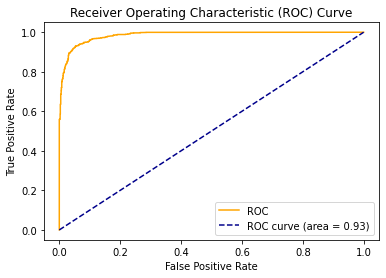

0.9299241198193293


In [75]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_ada1[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_ada1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_ada1))

## Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(random_state = 265)
gbr.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=265, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
y_pred_gbr = gbr.predict(x_test);y_pred_gbr

array([-1,  1, -1, ...,  1,  1,  1])

In [78]:
confusion_matrix(y_test,y_pred_gbr)

array([[1366,  114],
       [  66, 1771]])

In [79]:
accuracy_score(y_test,y_pred_gbr)

0.9457340970756708

In [80]:
print(classification_report(y_test,y_pred_gbr))

              precision    recall  f1-score   support

          -1       0.95      0.92      0.94      1480
           1       0.94      0.96      0.95      1837

    accuracy                           0.95      3317
   macro avg       0.95      0.94      0.94      3317
weighted avg       0.95      0.95      0.95      3317



In [81]:
auc_gbr = roc_auc_score(y_test,y_pred_gbr);auc_gbr

0.943522414630199

In [82]:
y_pred_prob_gbr = gbr.predict_proba(x_test);y_pred_prob_gbr

array([[0.52047841, 0.47952159],
       [0.18289061, 0.81710939],
       [0.9985963 , 0.0014037 ],
       ...,
       [0.01178186, 0.98821814],
       [0.00595749, 0.99404251],
       [0.32465835, 0.67534165]])

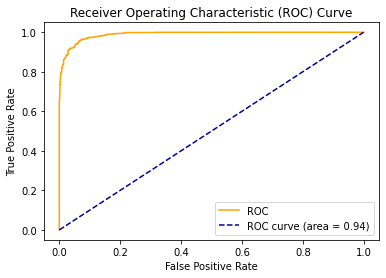

0.943522414630199


In [83]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_gbr[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_gbr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_gbr))

In [84]:
grid_param_gbr={'n_estimators':[25,50,100,250,500,1000,2000],'learning_rate':[.001,0.0001,0.00001,0.01,.1,1]}

In [85]:
grid_search_gbr = GridSearchCV(estimator=gbr,param_grid=grid_param_gbr,cv=5,n_jobs =-1,verbose = 3)
grid_search_gbr.fit(x_train,y_train)
grid_search_gbr.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 11.1min finished


{'learning_rate': 1, 'n_estimators': 1000}

In [86]:
gbr1 = GradientBoostingClassifier( n_estimators = 1000,learning_rate = 1,random_state=265)
gbr1.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=265, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [87]:
y_pred_gbr1 = gbr1.predict(x_test);y_pred_gbr1

array([ 1,  1, -1, ...,  1,  1,  1])

In [88]:
confusion_matrix(y_test,y_pred_gbr1)

array([[1414,   66],
       [  43, 1794]])

In [89]:
accuracy_score(y_test,y_pred_gbr1)

0.967138981006934

In [90]:
print(classification_report(y_test,y_pred_gbr1))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1480
           1       0.96      0.98      0.97      1837

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [91]:
auc_gbr1 = roc_auc_score(y_test,y_pred_gbr1);auc_gbr1

0.9659988377054245

In [92]:
y_pred_prob_gbr1 = gbr1.predict_proba(x_test);y_pred_prob_gbr1

array([[6.61885410e-03, 9.93381146e-01],
       [2.62285249e-05, 9.99973771e-01],
       [1.00000000e+00, 1.96942411e-38],
       ...,
       [1.73168966e-07, 9.99999827e-01],
       [1.69041225e-10, 1.00000000e+00],
       [3.91533032e-05, 9.99960847e-01]])

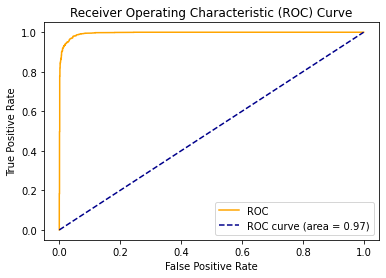

0.9659988377054245


In [93]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_gbr1[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_gbr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_gbr1))

## XG Boost

In [94]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 265)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=265,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [95]:
y_pred_xgb = xgb.predict(x_test);y_pred_xgb

array([-1,  1, -1, ...,  1,  1,  1])

In [96]:
accuracy_score(y_test,y_pred_xgb)

0.9430208019294544

In [97]:
confusion_matrix(y_test,y_pred_xgb)

array([[1355,  125],
       [  64, 1773]])

In [98]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

          -1       0.95      0.92      0.93      1480
           1       0.93      0.97      0.95      1837

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



In [99]:
auc_xgb = roc_auc_score(y_test,y_pred_xgb);auc_xgb

0.9403505642278097

In [100]:
y_pred_prob_xgb = xgb.predict_proba(x_test);y_pred_prob_xgb

array([[5.6160891e-01, 4.3839109e-01],
       [1.7710221e-01, 8.2289779e-01],
       [9.9948430e-01, 5.1572121e-04],
       ...,
       [1.0400057e-02, 9.8959994e-01],
       [6.8179965e-03, 9.9318200e-01],
       [3.5713685e-01, 6.4286315e-01]], dtype=float32)

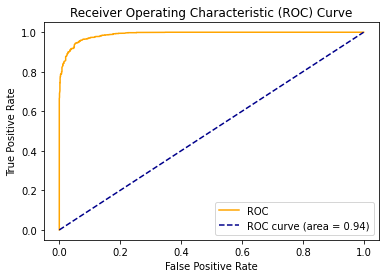

0.9403505642278097


In [101]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_xgb[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_xgb))

In [102]:
grid_param_xgb={'n_estimators':[25,50,100,250,500,1000,2000],'learning_rate':[.001,0.0001,0.00001,0.01,.1,1]}

In [103]:
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=grid_param_xgb,cv=5,n_jobs =-1,verbose = 3)
grid_search_xgb.fit(x_train,y_train)
grid_search_xgb.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  8.0min finished


{'learning_rate': 1, 'n_estimators': 2000}

In [104]:
xgb1 = GradientBoostingClassifier( n_estimators = 2000,learning_rate = 1,random_state=265)
xgb1.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=265, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [105]:
y_pred_xgb1 = xgb1.predict(x_test);y_pred_xgb1

array([ 1,  1, -1, ...,  1,  1,  1])

In [106]:
confusion_matrix(y_test,y_pred_xgb1)

array([[1416,   64],
       [  55, 1782]])

In [107]:
accuracy_score(y_test,y_pred_xgb1)

0.964124208622249

In [108]:
print(classification_report(y_test,y_pred_xgb1))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1480
           1       0.97      0.97      0.97      1837

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [109]:
auc_xgb1 = roc_auc_score(y_test,y_pred_xgb1);auc_xgb1

0.9634083184981388

In [110]:
y_pred_prob_xgb1 = xgb1.predict_proba(x_test);y_pred_prob_xgb1

array([[9.55162734e-04, 9.99044837e-01],
       [1.33082645e-05, 9.99986692e-01],
       [1.00000000e+00, 8.89134456e-78],
       ...,
       [2.19168239e-10, 1.00000000e+00],
       [2.62012634e-14, 1.00000000e+00],
       [1.14161596e-06, 9.99998858e-01]])

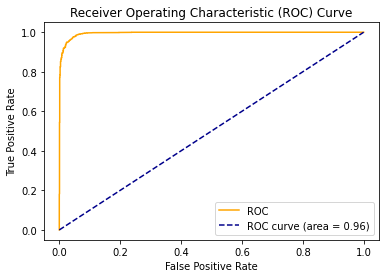

0.9634083184981388


In [111]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_xgb1[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_xgb1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_xgb1))

## KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [113]:
y_pred_knn = knn.predict(x_test);y_pred_knn

array([-1,  1, -1, ...,  1,  1,  1])

In [114]:
confusion_matrix(y_test,y_pred_knn)

array([[1357,  123],
       [  90, 1747]])

In [115]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      1480
           1       0.93      0.95      0.94      1837

    accuracy                           0.94      3317
   macro avg       0.94      0.93      0.93      3317
weighted avg       0.94      0.94      0.94      3317



In [116]:
auc_knn = roc_auc_score(y_test,y_pred_knn);auc_knn

0.9339494843237358

In [117]:
y_pred_prob_knn = knn.predict_proba(x_test);y_pred_prob_knn

array([[0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ]])

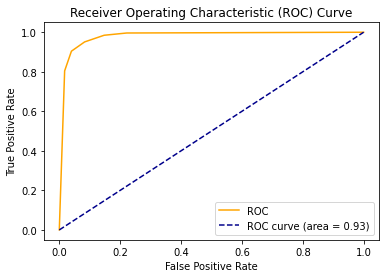

0.9339494843237358


In [118]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_knn[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_knn))

In [119]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34,35],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [120]:
grid_knn = GridSearchCV(knn, param_grid,verbose=3)
grid_knn.fit(x_train,y_train)
grid_knn.best_params_


Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.940, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.944, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.940, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.939, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.940, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.937, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.939, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.931, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.937, total= 

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  7.9min finished


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [121]:
knn1 = KNeighborsClassifier(algorithm="ball_tree",leaf_size = 18, n_neighbors=3)
knn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [122]:
y_pred_knn1 = knn1.predict(x_test);y_pred_knn1

array([-1,  1, -1, ...,  1,  1,  1])

In [123]:
confusion_matrix(y_test,y_pred_knn1)

array([[1361,  119],
       [  75, 1762]])

In [124]:
accuracy_score(y_test,y_pred_knn1)

0.9415134157371119

In [125]:
print(classification_report(y_test,y_pred_knn1))

              precision    recall  f1-score   support

          -1       0.95      0.92      0.93      1480
           1       0.94      0.96      0.95      1837

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



In [126]:
auc_knn1 = roc_auc_score(y_test,y_pred_knn1);auc_knn1

0.9393835792787888

In [127]:
y_pred_prob_knn1 = knn1.predict_proba(x_test);y_pred_prob_knn1

array([[0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

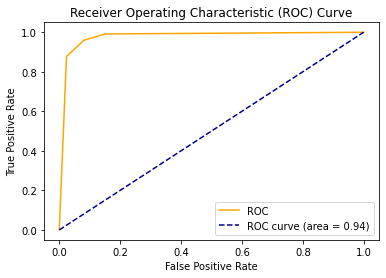

0.9393835792787888


In [128]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_knn1[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_knn1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_knn1))

## SVM

In [129]:
from sklearn.svm import SVC
sv = SVC(probability = True, random_state = 265)
sv.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=265, shrinking=True, tol=0.001,
    verbose=False)

In [130]:
y_pred_sv = sv.predict(x_test);y_pred_sv

array([-1,  1, -1, ...,  1,  1,  1])

In [131]:
confusion_matrix(y_test,y_pred_sv)

array([[1354,  126],
       [  59, 1778]])

In [132]:
accuracy_score(y_test,y_pred_sv)

0.9442267108833283

In [133]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

          -1       0.96      0.91      0.94      1480
           1       0.93      0.97      0.95      1837

    accuracy                           0.94      3317
   macro avg       0.95      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



In [134]:
auc_sv = roc_auc_score(y_test,y_pred_sv);auc_sv

0.941373640924539

In [135]:
y_pred_prob_sv = sv.predict_proba(x_test);y_pred_prob_sv

array([[6.97213442e-01, 3.02786558e-01],
       [6.94651757e-02, 9.30534824e-01],
       [9.99546703e-01, 4.53297055e-04],
       ...,
       [6.46968171e-02, 9.35303183e-01],
       [2.40887379e-02, 9.75911262e-01],
       [6.05365665e-02, 9.39463434e-01]])

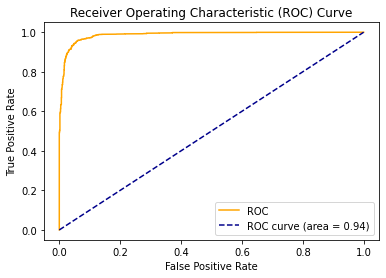

0.941373640924539


In [136]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_sv[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_sv)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_sv))

In [137]:
param_grid={'C':[0.1,1,0.2,0.5,0.001,0.05,0.02],'gamma':[1,0.5,0.001,0.1,0.01,0.0001]}

In [138]:
grid_sv = GridSearchCV(sv,param_grid, verbose=3, n_jobs=-1)
grid_sv.fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 32.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=265, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 0.2, 0.5, 0.001, 0.05, 0.02],
                         'gamma': [1, 0.5, 0.001, 0.1, 0.01, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [161]:
grid_sv.best_params_

{'C': 1, 'gamma': 0.1}

In [163]:
sv1 = SVC(probability = True, random_state = 265,C = 1,gamma = 0.1)
sv1.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=265, shrinking=True, tol=0.001,
    verbose=False)

In [164]:
y_pred_sv1 = sv1.predict(x_test);y_pred_sv1

array([-1,  1, -1, ...,  1,  1,  1])

In [165]:
confusion_matrix(y_test,y_pred_sv1)

array([[1380,  100],
       [  40, 1797]])

In [166]:
accuracy_score(y_test,y_pred_sv1)

0.9577931866144106

In [167]:
print(classification_report(y_test,y_pred_sv1))

              precision    recall  f1-score   support

          -1       0.97      0.93      0.95      1480
           1       0.95      0.98      0.96      1837

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [168]:
auc_sv1 = roc_auc_score(y_test,y_pred_sv1);auc_sv1

0.9553288999396784

In [169]:
y_pred_prob_sv1 = sv1.predict_proba(x_test);y_pred_prob_sv1

array([[0.80043569, 0.19956431],
       [0.02878463, 0.97121537],
       [0.99438219, 0.00561781],
       ...,
       [0.03873155, 0.96126845],
       [0.02878153, 0.97121847],
       [0.06263341, 0.93736659]])

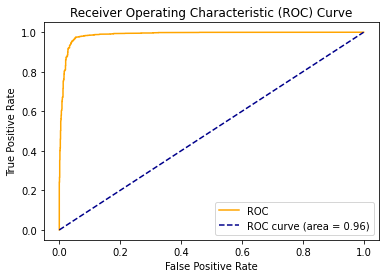

0.9553288999396784


In [170]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_sv1[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_sv1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_sv1))

## Naive Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [151]:
y_pred_nb = nb.predict(x_test);y_pred_nb

array([-1, -1, -1, ..., -1,  1, -1])

In [152]:
confusion_matrix(y_test,y_pred_nb)

array([[1476,    4],
       [1329,  508]])

In [153]:
accuracy_score(y_test,y_pred_nb)

0.5981308411214953

In [154]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

          -1       0.53      1.00      0.69      1480
           1       0.99      0.28      0.43      1837

    accuracy                           0.60      3317
   macro avg       0.76      0.64      0.56      3317
weighted avg       0.78      0.60      0.55      3317



In [158]:
auc_nb = roc_auc_score(y_test,y_pred_nb);auc_nb

0.6369175653606791

In [155]:
y_pred_prob_nb = nb.predict_proba(x_test);y_pred_prob_nb

array([[9.99999838e-01, 1.62388315e-07],
       [9.99849340e-01, 1.50659969e-04],
       [1.00000000e+00, 5.32313030e-11],
       ...,
       [9.98196206e-01, 1.80379415e-03],
       [4.99917679e-01, 5.00082321e-01],
       [9.94776801e-01, 5.22319879e-03]])

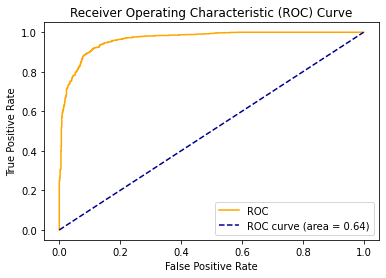

0.6369175653606791


In [160]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_nb[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_nb))

## Stacking

In [172]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X,y,test_size=0.5, random_state= 265)

# let's split the training set again into training and test dataset 
x_train1,x_test1,y_train1,y_test1 =  train_test_split(train,test,test_size=0.2, random_state= 265)

In [174]:
xgb = XGBClassifier(random_state=265)
print(xgb.fit(x_train1,y_train1))

log_reg = LogisticRegression(random_state=265)
print(log_reg.fit(x_train1,y_train1))

dt = DecisionTreeClassifier(random_state = 265)
print(dt.fit(x_train1,y_train1))

rf = RandomForestClassifier(random_state = 265)
print(rf.fit(x_train1,y_train1))

ada = AdaBoostClassifier(random_state=265)
print(ada.fit(x_train1,y_train1))

gb = GradientBoostingClassifier(random_state = 265)
print(gb.fit(x_train1,y_train1))

knn = KNeighborsClassifier()
print(knn.fit(x_train1,y_train1))

svm = SVC(probability = True, random_state=265)
print(svm.fit(x_train1,y_train1))

nb = GaussianNB()
print(nb.fit(x_train1,y_train1))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=265,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=265, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,

In [175]:
predict_val1 = knn.predict(val_train)
predict_val2 = rf.predict(val_train)
predict_val3 = gb.predict(val_train)
predict_val4 = log_reg.predict(val_train)
predict_val5 = ada.predict(val_train)
predict_val6 = dt.predict(val_train)
predict_val7 = nb.predict(val_train)
predict_val8 = svm.predict(val_train)

predict_val = np.column_stack((predict_val1,predict_val2,predict_val3,predict_val4,predict_val5,predict_val6,predict_val7,predict_val8))
predict_val

array([[-1,  1, -1, ...,  1, -1, -1],
       [ 1,  1,  1, ...,  1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1, -1,  1],
       [ 1,  1, -1, ...,  1, -1, -1]])

In [179]:
predict_test1 = knn.predict(x_test1)
predict_test2 = rf.predict(x_test1)
predict_test3 = gb.predict(x_test1)
predict_test4 = log_reg.predict(x_test1)
predict_test5 = ada.predict(x_test1)
predict_test6 = dt.predict(x_test1)
predict_test7 = nb.predict(x_test1)
predict_test8 = svm.predict(x_test1)

predict_test = np.column_stack((predict_test1,predict_test2,predict_test3,predict_test4,predict_test5,predict_test6,predict_test7,predict_test8))
predict_test

array([[ 1,  1,  1, ...,  1, -1,  1],
       [ 1,  1,  1, ...,  1, -1,  1],
       [-1,  1,  1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1, -1,  1]])

In [182]:
xg = xgb.fit(predict_val,val_test)
xgb.score(predict_test,y_test1)

0.9584086799276673

###### Random Forest gives better prediction compare to other models.